In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.expanduser('~/rds/rds-dsk-lab-eWkDxBhxBrQ/dimorl/code/mopo'))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_pred_means_and_vars, get_experiment_details

In [4]:
plt.rc('font', size=16)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [5]:
STATE_DIMS = 17
ACTION_DIMS = 6
REWARD_DIMS = 1
TERMINAL_DIMS = 1

DIMS = [STATE_DIMS, ACTION_DIMS, STATE_DIMS, REWARD_DIMS, TERMINAL_DIMS]
ENDS = np.cumsum(DIMS)

In [6]:
evaluation_datasets_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY: 0.5M"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M"),
    # ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    # ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    # ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("SAC-RT-0.1M-4-P0_10000", "SL: 0.1M"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M"),
    ("SAC-RT-0.5M-4-P0_10000", "SL: 0.5M"),
    ("SAC-RT-1M-4-P0_10000", "SL: 1M"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M"),
    # ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    # ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    # ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    # ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    # ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    # ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    # ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    # ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    # ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    # ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("D4RL-HC-M_10000", "D4RL: M"),
    ("D4RL-HC-ME_10000", "D4RL: ME"),
    ("D4RL-HC-MR_10000", "D4RL: MR"),
    ("D4RL-HC-R_10000", "D4RL: R"),
    ("RAND-1_10000", "Random 1"),
    ("RAND-2_10000", "Random 2"),
    ("RAND-3_10000", "Random 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

easy_dataset_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY 1 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY 1 - 0.5M Steps"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY 1 - 1M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
]
easy_datasets = [i[0] for i in easy_dataset_lables]
easy_labels = [i[1] for i in easy_dataset_lables]

hard_dataset_lables = [
    # ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY 1 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY 1 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY 1 - 1M Steps"),
    # ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    # ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    # ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    # ("D4RL-HC-M_10000", "D4RL Medium"),
    ("D4RL-HC-ME_10000", "D4RL Medium-Expert"),
    ("D4RL-HC-MR_10000", "D4RL Medium-Replay"),
    # ("D4RL-HC-R_10000", "D4RL Random"),
    # ("SAC-RT-0.1M-4-P0_10000", "Softlearning 1 - 0.1M Steps"),
    # ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1 - 0.25M Steps"),
    # ("SAC-RT-0.5M-4-P0_10000", "Softlearning 1 - 0.5M Steps"),
    # ("SAC-RT-1M-4-P0_10000", "Softlearning 1 - 1M Steps"),
    ("SAC-RT-2M-4-P0_10000", "Softlearning 1 - 2M Steps"),
    ("SAC-RT-3M-4-P0_10000", "Softlearning 1 - 3M Steps"),
    # ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    # ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    # ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    # ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    # ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    # ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    # ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    # ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    # ("RAND-1_10000", "Random Policy 1"),
    # ("RAND-2_10000", "Random Policy 2"),
    # ("RAND-3_10000", "Random Policy 3"),
]
hard_datasets = [i[0] for i in hard_dataset_lables]
hard_labels = [i[1] for i in hard_dataset_lables]

training_datasets = ['MIXED-RT-1']
# training_datasets_labels = [
#     ("RAND-2_10000", "Random Policy 2"),
#     ("RAND-9_10000", "Random Policy 9"),
#     ("D3RLPY-MP4-P4_10000", "100k Training Steps - Full Episodes"),
#     ("D3RLPY-MP5-P1_10000", "20k Training Steps - Full Episodes"),
#     ("D3RLPY-PAP9-P0_10000", "100k Training Steps - First 200 Episode Steps"),
# ]
# training_datasets = [i[0] for i in training_datasets_labels]
# training_labels = [i[1] for i in training_datasets_labels]


experiments_no_rex = ['MP748', 'MP749', 'MP750']
experiments_rex_01 = ['MP751', 'MP752', 'MP753']
experiments_rex_1  = ['MP754', 'MP755', 'MP756']
experiments_rex_5  = ['MP772', 'MP773', 'MP774']
experiments_rex_10 = ['MP757', 'MP758', 'MP759']

training_experiments = [
    *experiments_no_rex,
    *experiments_rex_01,
    *experiments_rex_1, 
    *experiments_rex_5, 
    *experiments_rex_10,
]

labels = ['No REx', 'REx: $\\beta=0.1$', 'REx: $\\beta=1.0$', 'REx: $\\beta=5.0$', 'REx: $\\beta=10.0$']

In [7]:
preds = {}
pred_summary = {}
for exp in training_experiments:
    preds[exp] = {}
    
    exp_details = get_experiment_details(exp, get_elites=True)
    elites = exp_details.elites
    key = ' - '.join((exp_details.name, exp_details.dataset, f'REx: {exp_details.rex}'))
    for data in evaluation_datasets:
        pred_means, pred_vars = get_pred_means_and_vars(exp, data)

        preds[exp][data] = {
            'pred_means': pred_means[elites, :, :],
            'pred_vars': pred_vars[elites, :, :],
        }

        pred_summary[(key, data)] = {
            'experiment': exp_details.name,
            'rex': exp_details.rex,
            'rex_beta': exp_details.rex_beta or 0.,
            'training_dataset': exp_details.dataset,
            'seed': exp_details.seed,
            'mean_pred_means': pred_means.mean(),
            'mean_pred_vars': pred_vars.mean(),
            'mean_std_norm': np.linalg.norm(np.sqrt(pred_vars), axis=-1).mean(),
            'max_std_norm': np.linalg.norm(np.sqrt(pred_vars), axis=-1).max(),
            'learned_max_pen': exp_details.max_penalty,
            'learned_min_pen': exp_details.min_penalty,
        }


In [8]:
pred_summary_df = (
    pd.DataFrame().from_dict(pred_summary, orient='index').
    reset_index().rename(columns={'level_0': 'key', 'level_1': 'evaluation_dataset'})
)

In [9]:
preds_groups = (
    pred_summary_df[['rex', 'rex_beta', 'training_dataset', 'evaluation_dataset', 'seed', 'mean_pred_means', 'mean_pred_vars', 'mean_std_norm', 'max_std_norm', 'learned_max_pen', 'learned_min_pen']].
    groupby(['rex', 'rex_beta', 'training_dataset', 'evaluation_dataset'])
    # groupby(['rex', 'training_dataset', 'evaluation_dataset'])
)
preds_avgs_df  = preds_groups.mean().reset_index()
preds_stds_df  = preds_groups.std().reset_index().replace(np.NaN, 0)
preds_mins_df  = preds_groups.min().reset_index().replace(np.NaN, 0)
preds_maxes_df = preds_groups.max().reset_index().replace(np.NaN, 0)

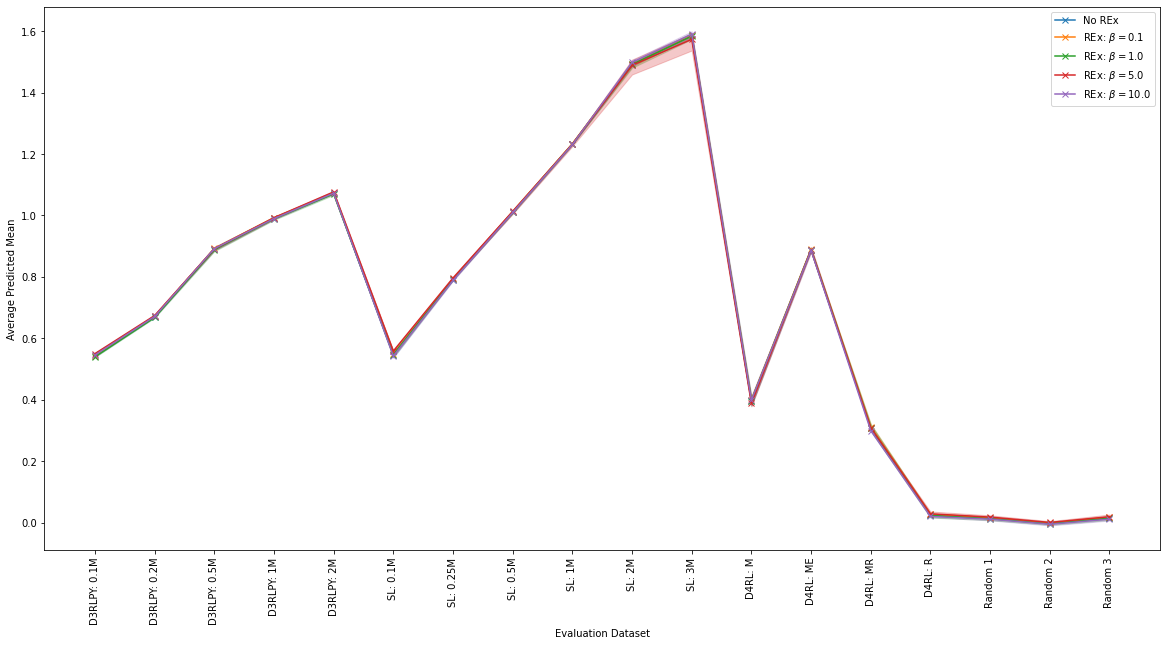

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

metric = 'mean_pred_means'
for t_ds in training_datasets:
    for i, (rex, rex_beta) in enumerate([(False, 10.), (True, 0.1), (True, 1.0), (True, 5.), (True, 10.)]):
        mask = (
            (preds_avgs_df['training_dataset'] == t_ds) &
            (preds_avgs_df['rex'] == rex) &
            (preds_avgs_df['rex_beta'] == rex_beta) &
            # (preds_avgs_df['seed'] == 4321) &
            (preds_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
        )
        plot_means = preds_avgs_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_mins = preds_mins_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_maxes = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        label = labels[i]
        p = ax.plot(evaluation_datasets, plot_means, label=label, marker='x')
        ax.fill_between(evaluation_datasets, plot_mins, plot_maxes, color=p[0].get_color(), alpha=0.25)
ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=90)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Average Predicted Mean')
ax.legend()

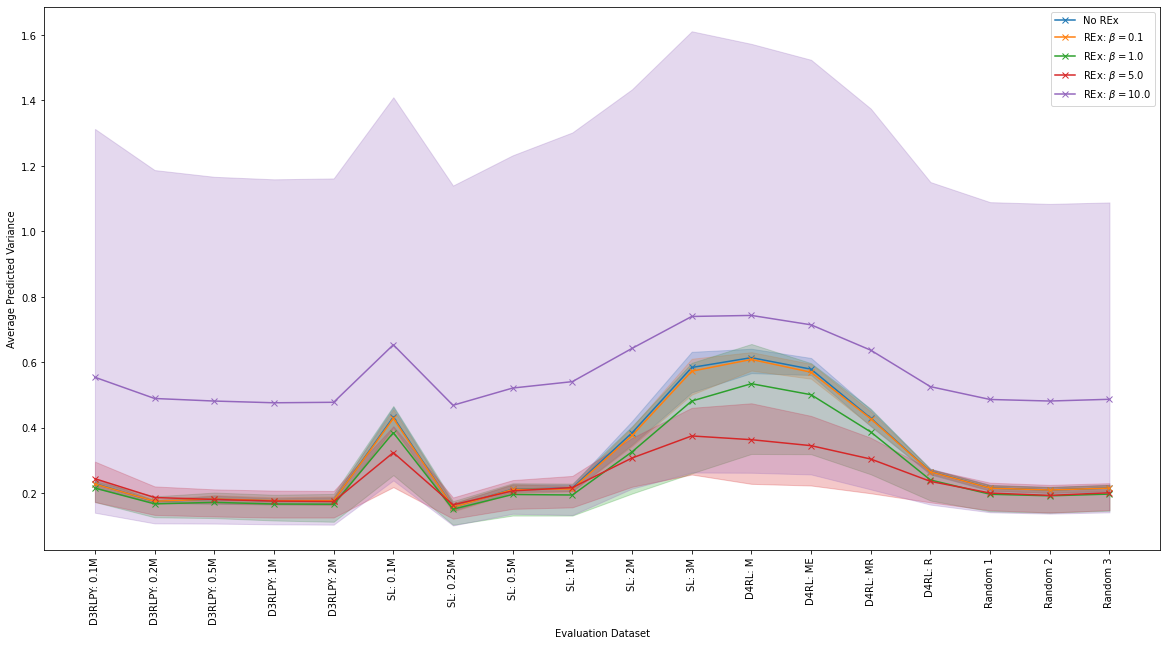

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

metric = 'mean_pred_vars'
for t_ds in training_datasets:
    for i, (rex, rex_beta) in enumerate([(False, 10.), (True, 0.1), (True, 1.0), (True, 5.), (True, 10.)]):
        mask = (
            (preds_avgs_df['training_dataset'] == t_ds) &
            (preds_avgs_df['rex'] == rex) &
            (preds_avgs_df['rex_beta'] == rex_beta) &
            # (preds_avgs_df['seed'] == 4321) &
            (preds_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
        )
        plot_means = preds_avgs_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_mins = preds_mins_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_maxes = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        label = labels[i]
        p = ax.plot(evaluation_datasets, plot_means, label=label, marker='x')
        ax.fill_between(evaluation_datasets, plot_mins, plot_maxes, color=p[0].get_color(), alpha=0.25)
ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=90)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Average Predicted Variance')
ax.legend()

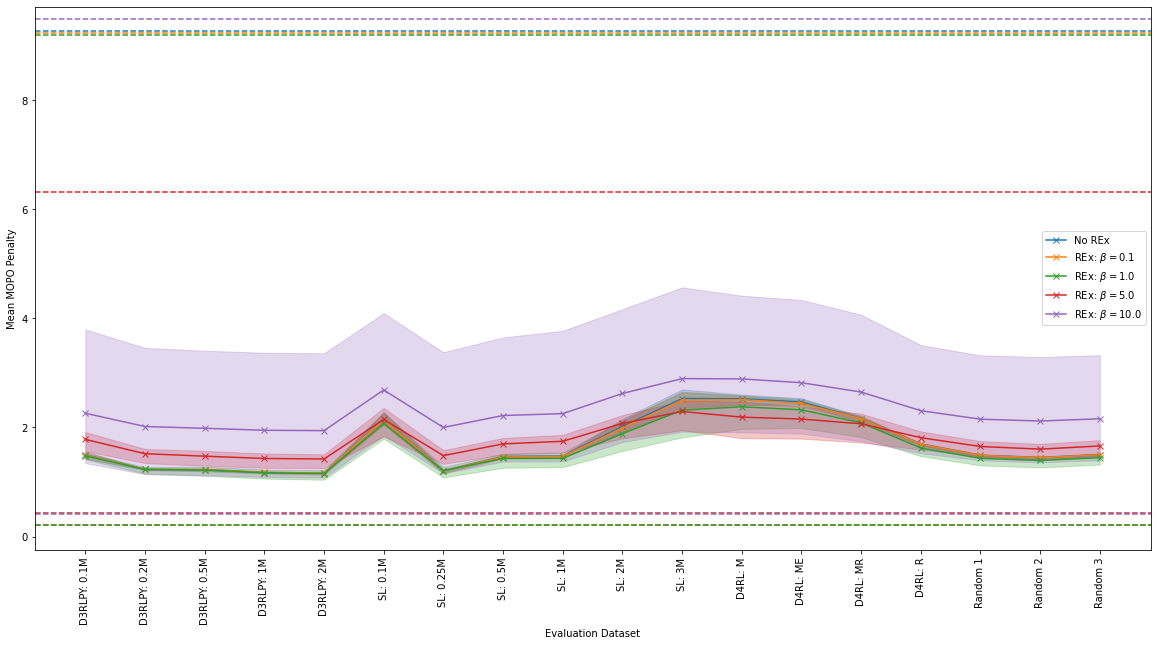

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

metric = 'mean_std_norm'
plot_dataset = evaluation_datasets
xtick_labels = evaluation_labels
for t_ds in training_datasets:
    for i, (rex, rex_beta) in enumerate([(False, 10.), (True, 0.1), (True, 1.0), (True, 5.), (True, 10.)]):
        mask = (
            (preds_avgs_df['training_dataset'] == t_ds) &
            (preds_avgs_df['rex'] == rex) &
            (preds_avgs_df['rex_beta'] == rex_beta) &
            # (preds_avgs_df['seed'] == 4321) &
            (preds_avgs_df['evaluation_dataset'].isin(plot_dataset)), ['evaluation_dataset' , metric, 'learned_max_pen', 'learned_min_pen']
        )
        plot_means = preds_avgs_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_mins = preds_mins_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_maxes = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_learned_max  = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset]['learned_max_pen'].mean()
        plot_learned_min  = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset]['learned_min_pen'].mean()
        label = labels[i]
        p = ax.plot(plot_dataset, plot_means, label=label, marker='x')
        ax.fill_between(plot_dataset, plot_mins, plot_maxes, color=p[0].get_color(), alpha=0.25)
        ax.axhline(plot_learned_max, color=p[0].get_color(), ls='--')
        ax.axhline(plot_learned_min, color=p[0].get_color(), ls='--')
ax.set_xticks(ax.get_xticks(), xtick_labels, rotation=90)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Mean MOPO Penalty')
ax.legend()

KeyError: "['SAC-RT-2M-2-P0_10000', 'SAC-RT-3M-2-P0_10000'] not in index"

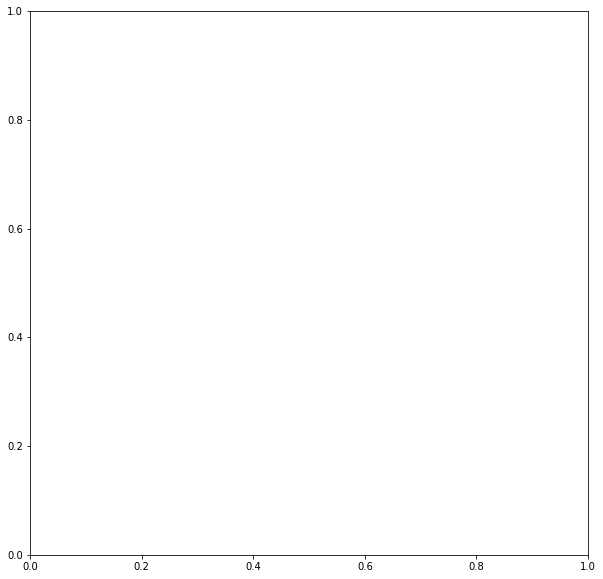

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

metric = 'mean_std_norm'
plot_dataset = hard_datasets
xtick_labels = hard_labels
for t_ds in training_datasets:
    for i, (rex, rex_beta) in enumerate([(False, 10.), (True, 0.1), (True, 1.0), (True, 5.), (True, 10.)]):
        mask = (
            (preds_avgs_df['training_dataset'] == t_ds) &
            (preds_avgs_df['rex'] == rex) &
            (preds_avgs_df['rex_beta'] == rex_beta) &
            # (preds_avgs_df['seed'] == 4321) &
            (preds_avgs_df['evaluation_dataset'].isin(plot_dataset)), ['evaluation_dataset' , metric, 'learned_max_pen', 'learned_min_pen']
        )
        plot_means = preds_avgs_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_mins = preds_mins_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_maxes = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_learned_max  = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset]['learned_max_pen'].mean()
        plot_learned_min  = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset]['learned_min_pen'].mean()
        label = labels[i]
        p = ax.plot(plot_dataset, plot_means, label=label, marker='x')
        ax.fill_between(plot_dataset, plot_mins, plot_maxes, color=p[0].get_color(), alpha=0.25)
        ax.axhline(plot_learned_max, color=p[0].get_color(), ls='--')
        ax.axhline(plot_learned_min, color=p[0].get_color(), ls='--')
ax.set_xticks(ax.get_xticks(), xtick_labels, rotation=90)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Mean MOPO Penalty')
ax.legend()

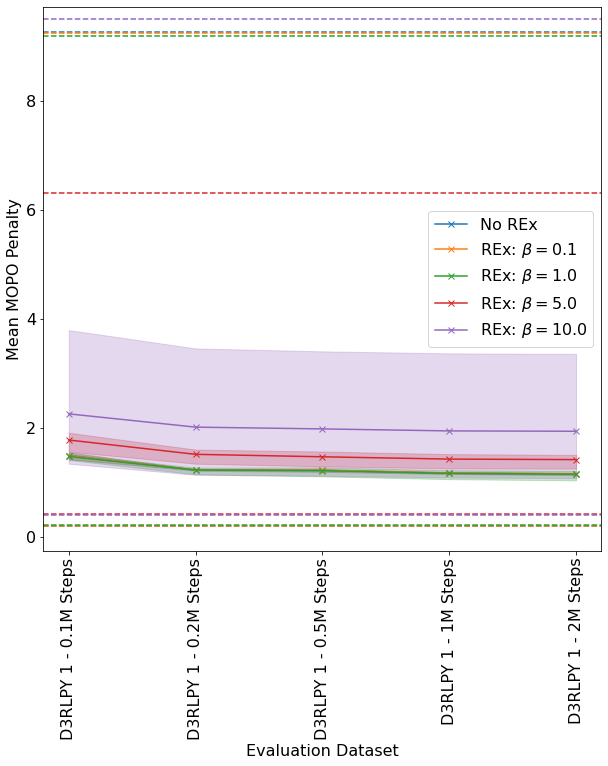

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

metric = 'mean_std_norm'
plot_dataset = easy_datasets
xtick_labels = easy_labels
for t_ds in training_datasets:
    for i, (rex, rex_beta) in enumerate([(False, 10.), (True, 0.1), (True, 1.0), (True, 5.), (True, 10.)]):
        mask = (
            (preds_avgs_df['training_dataset'] == t_ds) &
            (preds_avgs_df['rex'] == rex) &
            (preds_avgs_df['rex_beta'] == rex_beta) &
            # (preds_avgs_df['seed'] == 4321) &
            (preds_avgs_df['evaluation_dataset'].isin(plot_dataset)), ['evaluation_dataset' , metric, 'learned_max_pen', 'learned_min_pen']
        )
        plot_means = preds_avgs_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_mins = preds_mins_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_maxes = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_learned_max  = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset]['learned_max_pen'].mean()
        plot_learned_min  = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset]['learned_min_pen'].mean()
        label = labels[i]
        p = ax.plot(plot_dataset, plot_means, label=label, marker='x')
        ax.fill_between(plot_dataset, plot_mins, plot_maxes, color=p[0].get_color(), alpha=0.25)
        ax.axhline(plot_learned_max, color=p[0].get_color(), ls='--')
        ax.axhline(plot_learned_min, color=p[0].get_color(), ls='--')
ax.set_xticks(ax.get_xticks(), xtick_labels, rotation=90)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Mean MOPO Penalty')
ax.legend()

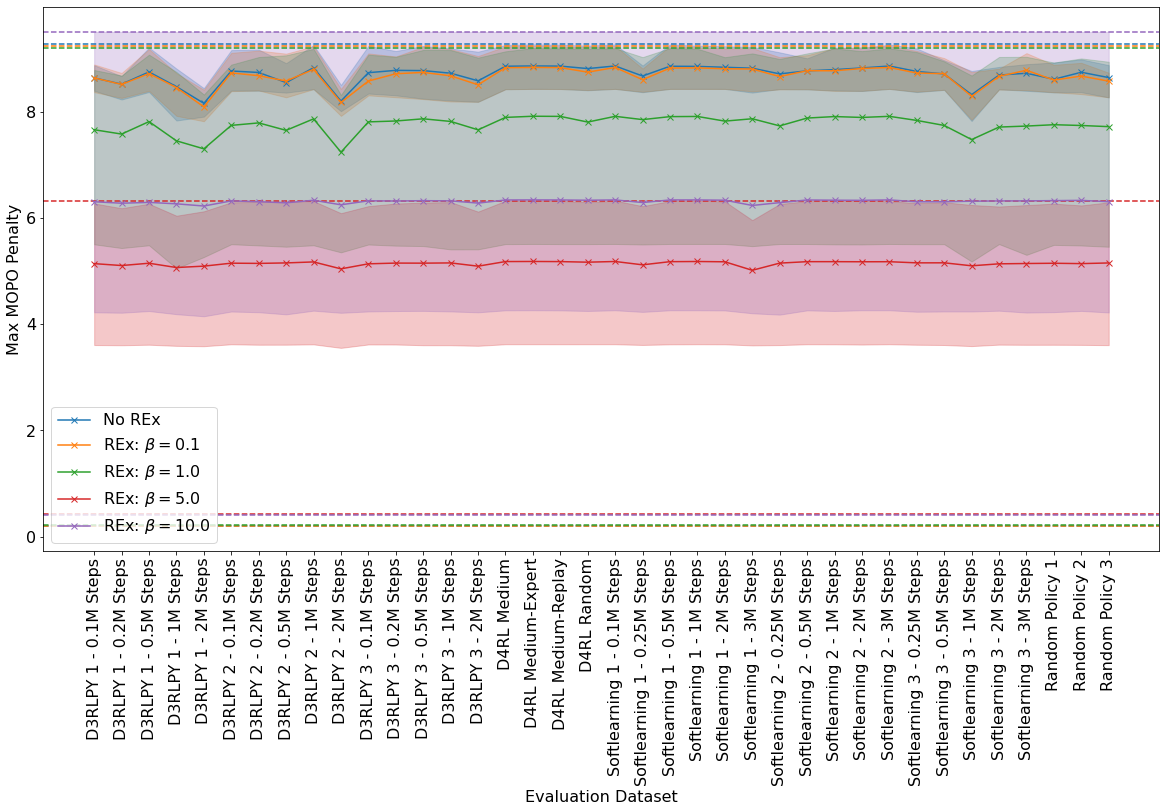

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

metric = 'max_std_norm'
plot_dataset = evaluation_datasets
xtick_labels = evaluation_labels
for t_ds in training_datasets:
    for i, (rex, rex_beta) in enumerate([(False, 10.), (True, 0.1), (True, 1.0), (True, 5.), (True, 10.)]):
        mask = (
            (preds_avgs_df['training_dataset'] == t_ds) &
            (preds_avgs_df['rex'] == rex) &
            (preds_avgs_df['rex_beta'] == rex_beta) &
            # (preds_avgs_df['seed'] == 4321) &
            (preds_avgs_df['evaluation_dataset'].isin(plot_dataset)), ['evaluation_dataset' , metric, 'learned_max_pen', 'learned_min_pen']
        )
        plot_means = preds_avgs_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_mins = preds_mins_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_maxes = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset][metric]
        plot_learned_max  = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset]['learned_max_pen'].mean()
        plot_learned_min  = preds_maxes_df.loc[mask].set_index('evaluation_dataset').loc[plot_dataset]['learned_min_pen'].mean()
        label = labels[i]
        p = ax.plot(plot_dataset, plot_means, label=label, marker='x')
        ax.fill_between(evaluation_datasets, plot_mins, plot_maxes, color=p[0].get_color(), alpha=0.25)
        ax.axhline(plot_learned_max, color=p[0].get_color(), ls='--')
        ax.axhline(plot_learned_min, color=p[0].get_color(), ls='--')
ax.set_xticks(ax.get_xticks(), xtick_labels, rotation=90)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Max MOPO Penalty')
ax.legend()